In [1]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import
from __future__ import unicode_literals

import os
import sys

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set()
sns.set_style("whitegrid")
sns.set_context("poster")

mpl.rcParams['figure.figsize'] = [8.0*2, 6.0*2]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 30
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['ytick.labelsize'] = 30
mpl.rcParams['xtick.labelsize'] = 30
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'



# Introduction

On fait des plots sur les runs

In [3]:
from problem.workflow import pprint

# Data

In [4]:
from problem.mnist import load_data

In [5]:
X, y = load_data()

# Load models

In [6]:
from problem.mnist import get_save_directory
from problem.mnist import preprocessing
from problem.mnist import skew
from problem.mnist import tangent
from problem.mnist import get_cv_iter

# from main import get_data_shape

In [7]:
def load_models(model_class, *args, **kwargs):
    models = []
    cv_iter = get_cv_iter(X, y)
    n_cv = len(cv_iter)
    pprint('Loading', n_cv, model_class.__name__)
    for i in range(n_cv):
        model = model_class(*args, **kwargs)
        save_directory = get_save_directory()
        model_name = '{}-{}'.format(model.get_name(), i)
        path = os.path.join(save_directory, model_name)
        model.load(path)
        models.append(model)
    return models

In [8]:
from models.mnist import NeuralNetModel
from models.mnist import AugmentedNeuralNetModel
from models.mnist import TangentPropModel
from models.mnist import AugmentedTangentPropModel
from models.mnist import PivotModel


# Test submission

In [9]:
from problem.mnist import test_submission


In [10]:
def get_mean_std(df_list):
    z = df_list[0]['z']
    acc = np.concatenate([df['error'].values.reshape(-1, 1) for df in df_list], axis=1)
    mean_acc = np.mean(acc, axis=1)
    std_acc = np.std(acc, axis=1)
    return mean_acc, std_acc

In [11]:
# z_list = list(range(-50, 51, 10)) + list(range(-5, 6, 1))
# z_list = sorted(z_list)
z_list = np.linspace(-10, 10, num=11)

print(z_list)

[-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]


In [12]:
NN_models = load_models(NeuralNetModel, n_steps=10000, batch_size=128, cuda=True)
df_list = test_submission(NN_models, X, y, z_list=z_list)
NN_mean_acc, NN_std_acc = get_mean_std(df_list)


2018-04-17 11:09:58 Loading 12 NeuralNetModel
2018-04-17 11:10:02 testing model 1/12
2018-04-17 11:10:23 testing model 2/12
2018-04-17 11:10:44 testing model 3/12
2018-04-17 11:11:04 testing model 4/12
2018-04-17 11:11:24 testing model 5/12
2018-04-17 11:11:45 testing model 6/12
2018-04-17 11:12:04 testing model 7/12
2018-04-17 11:12:25 testing model 8/12
2018-04-17 11:12:45 testing model 9/12
2018-04-17 11:13:06 testing model 10/12
2018-04-17 11:13:27 testing model 11/12
2018-04-17 11:13:47 testing model 12/12
2018-04-17 11:14:07 Done.


In [13]:
ANN_models = load_models(AugmentedNeuralNetModel, skewing_function=skew, n_augment=5,
                         batch_size=128, n_steps=10000, width=10., cuda=True)
df_list = test_submission(ANN_models, X, y, z_list=z_list)
ANN_mean_acc, ANN_std_acc = get_mean_std(df_list)


2018-04-17 11:14:07 Loading 12 AugmentedNeuralNetModel
2018-04-17 11:14:08 testing model 1/12
2018-04-17 11:14:28 testing model 2/12
2018-04-17 11:14:49 testing model 3/12
2018-04-17 11:15:10 testing model 4/12
2018-04-17 11:15:30 testing model 5/12
2018-04-17 11:15:52 testing model 6/12
2018-04-17 11:16:12 testing model 7/12
2018-04-17 11:16:32 testing model 8/12
2018-04-17 11:16:55 testing model 9/12
2018-04-17 11:17:17 testing model 10/12
2018-04-17 11:17:39 testing model 11/12
2018-04-17 11:18:01 testing model 12/12
2018-04-17 11:18:20 Done.


In [14]:
TP_models = load_models(TangentPropModel, skewing_function=skew, trade_off=0.01, 
                        batch_size=128, n_steps=10000, cuda=True )
df_list = test_submission(TP_models, X, y, z_list=z_list)
TP_mean_acc, TP_std_acc = get_mean_std(df_list)


2018-04-17 11:18:20 Loading 12 TangentPropModel
2018-04-17 11:18:21 testing model 1/12
2018-04-17 11:18:41 testing model 2/12
2018-04-17 11:19:02 testing model 3/12
2018-04-17 11:19:24 testing model 4/12
2018-04-17 11:19:46 testing model 5/12
2018-04-17 11:20:07 testing model 6/12
2018-04-17 11:20:30 testing model 7/12
2018-04-17 11:20:52 testing model 8/12
2018-04-17 11:21:14 testing model 9/12
2018-04-17 11:21:36 testing model 10/12
2018-04-17 11:21:58 testing model 11/12
2018-04-17 11:22:17 testing model 12/12
2018-04-17 11:22:36 Done.


In [15]:
PAN_models = load_models(PivotModel, skewing_function=skew, batch_size=128, n_recovery_steps=5,
                         n_clf_pre_training_steps=3000, n_adv_pre_training_steps=3000, n_steps=10000,
                         width=10., trade_off=1.0, cuda=True)
df_list = test_submission(PAN_models, X, y, z_list=z_list)
PAN_mean_acc, PAN_std_acc = get_mean_std(df_list)


2018-04-17 11:22:36 Loading 12 PivotModel
2018-04-17 11:22:38 testing model 1/12
2018-04-17 11:22:57 testing model 2/12
2018-04-17 11:23:16 testing model 3/12
2018-04-17 11:23:34 testing model 4/12
2018-04-17 11:23:53 testing model 5/12
2018-04-17 11:24:12 testing model 6/12
2018-04-17 11:24:31 testing model 7/12
2018-04-17 11:24:50 testing model 8/12
2018-04-17 11:25:10 testing model 9/12
2018-04-17 11:25:28 testing model 10/12
2018-04-17 11:25:48 testing model 11/12
2018-04-17 11:26:06 testing model 12/12
2018-04-17 11:26:25 Done.


# Plot


- What about confusion matrices ???


## Accuracy

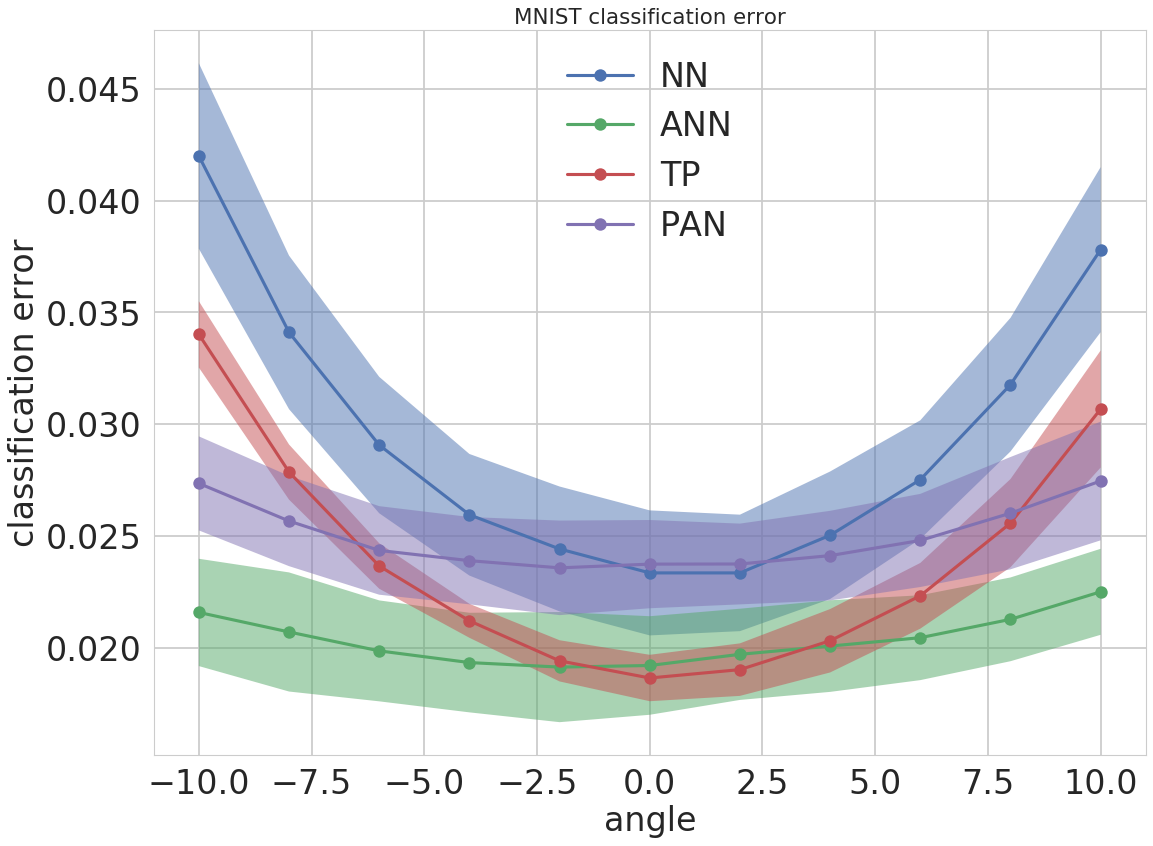

In [16]:
z = z_list

plt.plot(z, NN_mean_acc, 'o-', label='NN')
plt.fill_between(z, NN_mean_acc+NN_std_acc, NN_mean_acc-NN_std_acc, alpha=0.5)

plt.plot(z, ANN_mean_acc, 'o-', label='ANN')
plt.fill_between(z, ANN_mean_acc+ANN_std_acc, ANN_mean_acc-ANN_std_acc, alpha=0.5)

plt.plot(z, TP_mean_acc, 'o-', label='TP')
plt.fill_between(z, TP_mean_acc+TP_std_acc, TP_mean_acc-TP_std_acc, alpha=0.5)

plt.plot(z, PAN_mean_acc, 'o-', label='PAN')
plt.fill_between(z, PAN_mean_acc+PAN_std_acc, PAN_mean_acc-PAN_std_acc, alpha=0.5)

plt.title('MNIST classification error')

plt.xlabel('angle', fontsize=30)
plt.ylabel('classification error', fontsize=30)
plt.legend(prop={'size': 30})
plt.show()


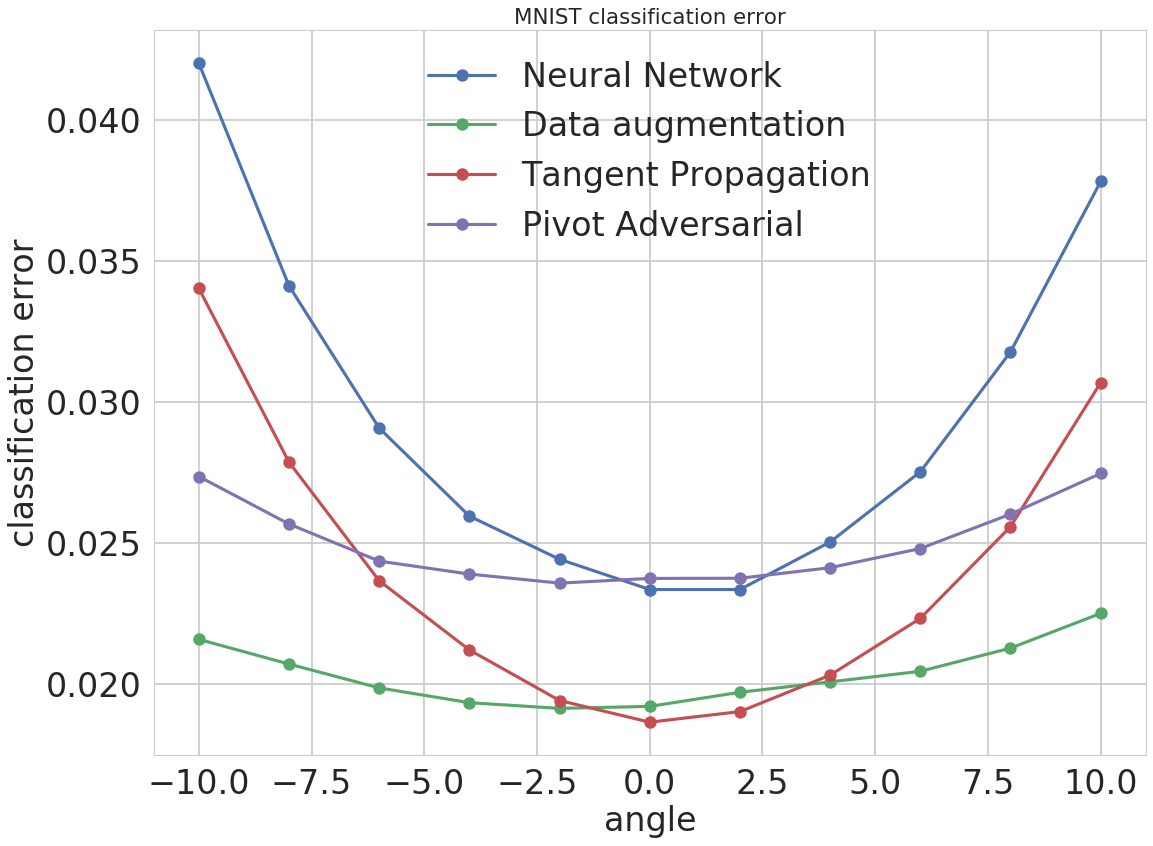

In [17]:
z = z_list

plt.plot(z, NN_mean_acc, 'o-', label='Neural Network')
# plt.fill_between(z, NN_mean_acc+NN_std_acc, NN_mean_acc-NN_std_acc, alpha=0.5)

plt.plot(z, ANN_mean_acc, 'o-', label='Data augmentation')
# plt.fill_between(z, ANN_mean_acc+ANN_std_acc, ANN_mean_acc-ANN_std_acc, alpha=0.5)

plt.plot(z, TP_mean_acc, 'o-', label='Tangent Propagation')
# plt.fill_between(z, TP_mean_acc+TP_std_acc, TP_mean_acc-TP_std_acc, alpha=0.5)

plt.plot(z, PAN_mean_acc, 'o-', label='Pivot Adversarial')
# plt.fill_between(z, PAN_mean_acc+PAN_std_acc, PAN_mean_acc-PAN_std_acc, alpha=0.5)

plt.title('MNIST classification error')

plt.xlabel('angle', fontsize=30)
plt.ylabel('classification error', fontsize=30)
plt.legend(prop={'size': 30})
plt.show()


## Losses

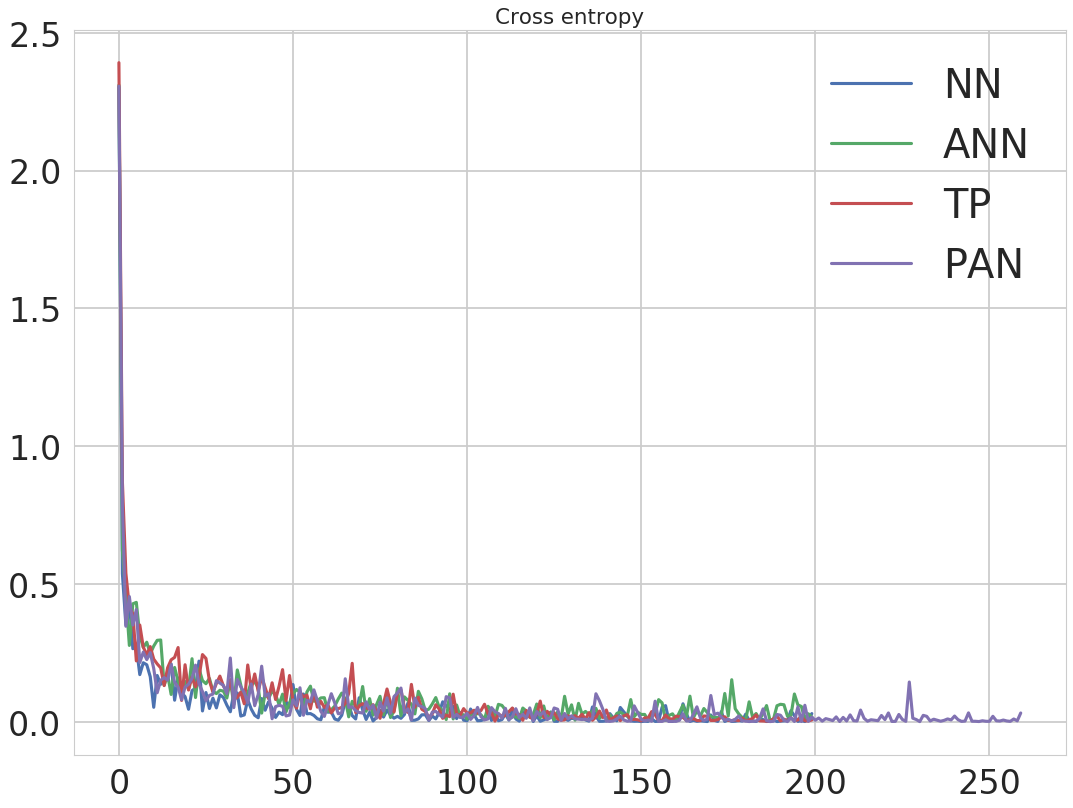

In [18]:
i = 0

plt.plot(NN_models[i].loss_hook.losses[::50], label='NN')
plt.plot(ANN_models[i].loss_hook.losses[::50], label='ANN')
plt.plot(TP_models[i].loss_hook.losses[::50], label='TP')
plt.plot(PAN_models[i].dloss_hook.losses[::50], label='PAN')

plt.title('Cross entropy')
plt.legend()
plt.show()

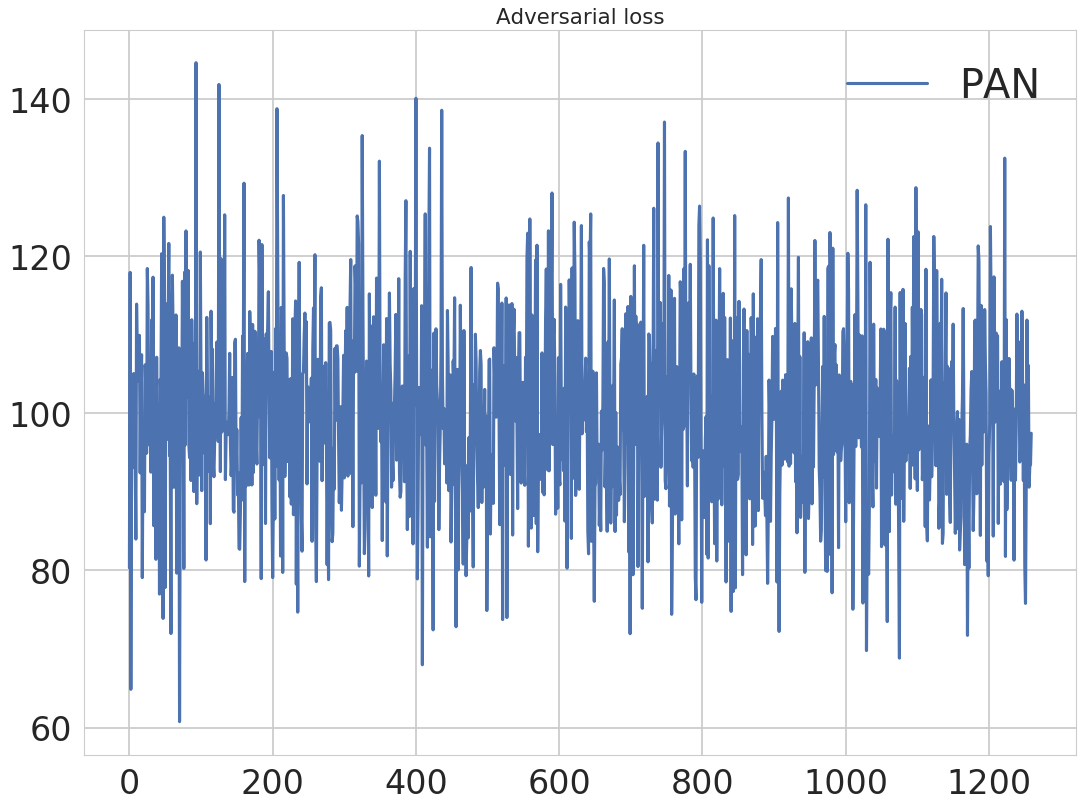

In [19]:
i = 0

plt.plot(PAN_models[i].rloss_hook.losses[::50], label='PAN')

plt.title('Adversarial loss')
plt.legend()
plt.show()

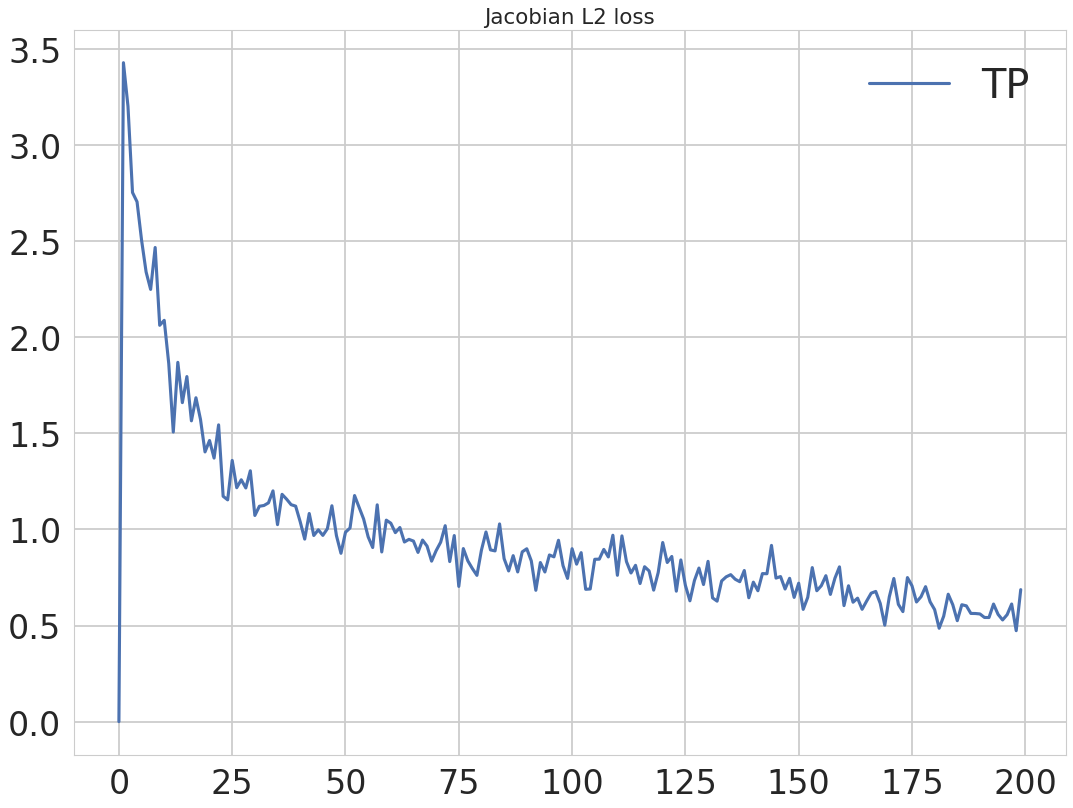

In [20]:
i = 0

plt.plot(TP_models[i].jloss_hook.losses[::50], label='TP')

plt.title('Jacobian L2 loss')
plt.legend()
plt.show()

# Playground

In [21]:
NN_models = load_models(NeuralNetModel, n_steps=10000, batch_size=128, cuda=True)

ANN_models = load_models(AugmentedNeuralNetModel, skewing_function=skew, n_augment=5,
                         batch_size=128, n_steps=10000, width=10., cuda=True)

TP_models = load_models(TangentPropModel, skewing_function=skew, trade_off=0.01, 
                        batch_size=128, n_steps=10000, cuda=True )

PAN_models = load_models(PivotModel, skewing_function=skew, batch_size=128, n_recovery_steps=5,
                         n_clf_pre_training_steps=3000, n_adv_pre_training_steps=3000, n_steps=10000,
                         width=10., trade_off=0.1, cuda=True)


2018-04-17 11:26:27 Loading 12 NeuralNetModel
2018-04-17 11:26:27 Loading 12 AugmentedNeuralNetModel
2018-04-17 11:26:28 Loading 12 TangentPropModel
2018-04-17 11:26:28 Loading 12 PivotModel


FileNotFoundError: [Errno 2] No such file or directory: '/data/titanic_3/users/vestrade/savings/mnist/PivotModel-3000-3000-10000-5-0.001-128-0.001-0.1-10.0-0/dnet_weights.pth'

## Study improvement at Z=0

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

sns.set_style("white")


In [ ]:
i = 7
baseline = NN_models[i]
tp = TP_models[i]
ann = ANN_models[i]
pan = PAN_models[i]

cv_iter = get_cv_iter(X, y)
n_cv = len(cv_iter)
cv = cv_iter[i]
train_idx, test_idx = cv
X_train = X[train_idx]
y_train = y[train_idx]
X_test = X[test_idx]
y_test = y[test_idx]


In [ ]:
print( 'training score :', baseline.score(X_train, y_train) )
print( 'testing  score :', baseline.score(X_test, y_test) )
print( 'training score :', tp.score(X_train, y_train) )
print( 'testing  score :', tp.score(X_test, y_test) )
print( 'training score :', ann.score(X_train, y_train) )
print( 'testing  score :', ann.score(X_test, y_test) )
print( 'training score :', pan.score(X_train, y_train) )
print( 'testing  score :', pan.score(X_test, y_test) )


In [ ]:
y_pred_baseline = baseline.predict(X_test)
y_pred_tp = tp.predict(X_test)
y_pred_ann = ann.predict(X_test)
y_pred_pan = pan.predict(X_test)

In [ ]:
# idx where Model is wright and NN is wrong :

idx = ( np.logical_and(y_pred_baseline != y_test, y_pred_tp == y_test) )
# idx = ( np.logical_and(y_pred_baseline != y_test, y_pred_ann == y_test) )
# idx = ( np.logical_and(y_pred_baseline != y_test, y_pred_pan == y_test) )


X_better = X_test[idx]
y_better_baseline = y_pred_baseline[idx]
y_better = y_test[idx]

In [ ]:
print( X_better.shape )


In [ ]:
fig = plt.figure(figsize=(20, 80))
nrows = 4
ncols = 6
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                 axes_pad=0.4,  # pad between axes in inch.
                 )

sample = np.random.choice(np.arange(X_better.shape[0]), size=nrows*ncols, replace=False)

for j, img_idx in enumerate(sample):
    img = X_better[img_idx].reshape(28, 28)
    grid[j].imshow(img, cmap='gray')
    grid[j].set_title('NN {} / {} M+'.format(y_better_baseline[img_idx], y_better[img_idx]))
    grid[j].get_xaxis().set_visible(False)
    grid[j].get_yaxis().set_visible(False)


plt.plot()
plt.show()

## Other

In [ ]:
# i = 0
# m = models[i]
# cv_iter = get_cv_iter(X, y)
# idx_dev, idx_valid = cv_iter[i]
# X_test = X[idx_valid]
# y_test = y[idx_valid]
# acc = accuracy_score(y_test, m.predict(X_test))

# print(acc)


In [ ]:
# XX = skew(X_test, z=80)
# y_pred = m.predict(XX)
# acc = accuracy_score(y_test, m.predict(XX))
# print(acc)

# i = np.random.randint(0, XX.shape[0])
# plt.imshow(XX[i].reshape(28,28))

# plt.title('label = {}<->truth = {}'.format(y_pred[i], y_test[i]))
# plt.show()

# plt.imshow(X_test[i].reshape(28,28))
# plt.show()


In [ ]:
# X_test.shape

In [ ]:
# from myNNDA import data_augment

In [ ]:
# XX = X[:200]
# yy = y[:200]
# XX2, yy, _ = data_augment(XX, yy, None)

In [ ]:
# i = 67
# x = XX2[i].reshape(28, 28)
# plt.imshow(x, cmap='Greys')
# plt.title('skewed')
# plt.show()
# x = XX[i].reshape(28, 28)
# plt.imshow(x, cmap='Greys')
# plt.title('original')
# plt.show()